# Victoria Rent Trends

## Purpose
Analyze historical trends in median weekly rents in Victoria (VIC) from 2020 onwards, visualize changes over time, and compute total rent growth percentages.

## Inputs
- `Median weekly rent.csv` – monthly median rent data by state.

## Outputs
- Line plot of median weekly rent in VIC over time.

## Key Steps
1. Load historical rent data 
3. Plot median weekly rent over time using a line plot.
4. Calculate total growth in median weekly rent from Jan 2020 to the latest available month.

In [ ]:
import os
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
trends_df = pd.read_csv("../../datasets/Median weekly rent.csv",  skiprows=1)
trends_df.rename(columns={'Unnamed: 0': 'Month'}, inplace=True)
trends_df.head()

,Month,NSW ($),VIC ($),Qld ($),SA ($),WA ($),TAS ($),NT ($),ACT ($)
0,Jun-18,490.0,375.0,380.0,320.0,350.0,270.0,450.0,470.0
1,Jul-18,490.0,380.0,380.0,320.0,350.0,265.0,450.0,470.0
2,Aug-18,490.0,380.0,380.0,320.0,350.0,270.0,450.0,465.0
3,Sep-18,490.0,385.0,375.0,320.0,350.0,265.0,450.0,465.0
4,Oct-18,480.0,380.0,375.0,320.0,350.0,270.0,450.0,470.0


In [5]:
trends_df.rename(columns={'Unnamed: 0': 'Month'}, inplace=True)

# Keep only Month and VIC columns
df_vic = trends_df[['Month', 'VIC ($)']].copy()
df_vic.rename(columns={'VIC ($)': 'VIC'}, inplace=True)

# Convert Month to datetime
df_vic = df_vic[df_vic['Month'].str.match(r'^[A-Za-z]{3}-\d{2}$')]

# Convert Month to datetime
df_vic['Month'] = pd.to_datetime(df_vic['Month'], format='%b-%y')


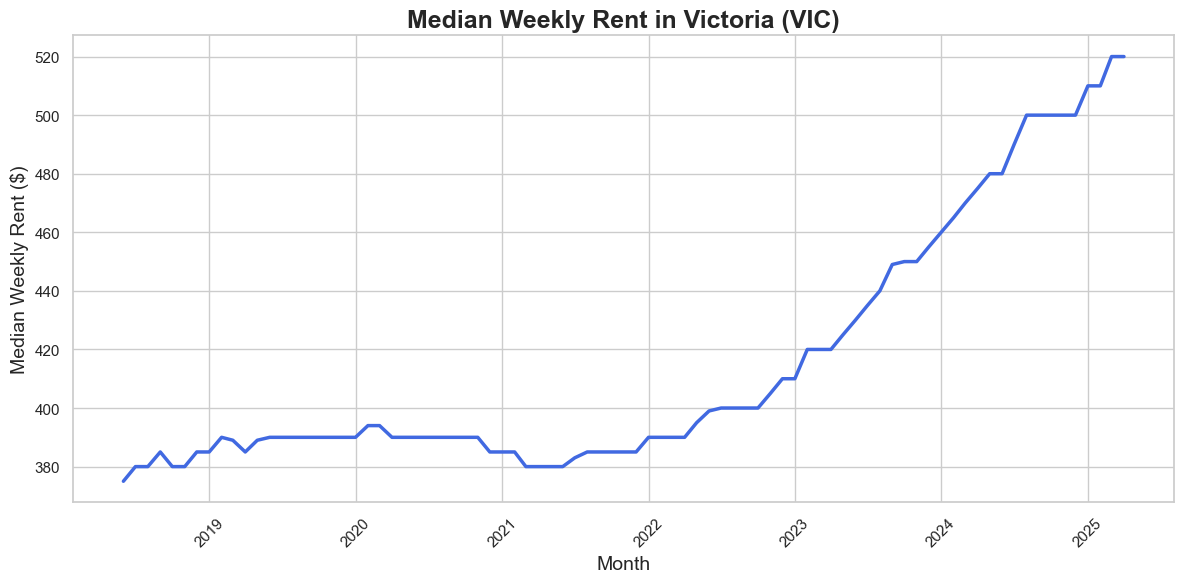

In [ ]:
# Plot
sns.set_theme(style="whitegrid")  
plt.figure(figsize=(12,6))

sns.lineplot(data=df_vic, x='Month', y='VIC', color='royalblue', linewidth=2.5)

plt.title('Median Weekly Rent in Victoria (VIC)', fontsize=18, weight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Median Weekly Rent ($)', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_since_2020 = df_vic[df_vic['Month'] >= '2020-01-01']

# Calculate total growth from first to last value
start_rent = df_since_2020['VIC'].iloc[0]
end_rent = df_since_2020['VIC'].iloc[-1]

total_growth_pct = ((end_rent - start_rent) / start_rent) * 100
print(f"Total growth since Jan 2020: {total_growth_pct:.1f}%")

Total growth since Jan 2020: 33.3%
